# Problem Summary
Banks offer various kinds of accounts and provide loans based on the requirements. Apart from it, there are other various activities like investments in market and different funds. Overall, the banking sector has a wide impact on the economy directly and indirectly.

There are many banks across the globe that are leveraging machine learning and AI in their daily routine and getting benefits out of it.

For example, top banks in the US like JPMorgan, Wells Fargo, Bank of America, City Bank and US banks are already using machine learning to provide various facilities to customers as well as for risk prevention and detection. Some of the applications include:

1. Customer Support

2. Fraud Detection

3. Risk Modelling

4. Marketing Analytics

5. Customer Segmentation



This weekend we bring to you another hackathon to apply your data science and machine learning skills to solve a problem in the banking sector. So get your thinking hat on and dive in this Friday.

How lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

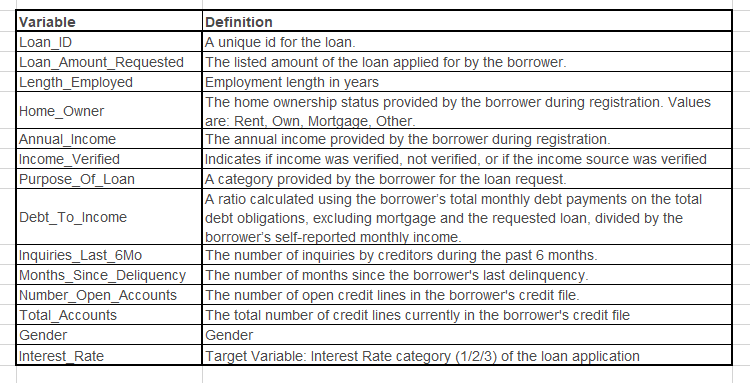

# Import important Libraries

In [1]:
# Importing Libraries EDA Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for Encoding 
# Label will provide numberical value for categorical feature
# One hot coder will create different columns
# We can use pd.get_dummpy('feature name', drop_frist =True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()

# Libraries for Standardization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Sc = StandardScaler()
Mnmx_Sc= MinMaxScaler()


# for model building
# train test split
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,GridSearchCV,KFold
skf = StratifiedKFold(n_splits=10,random_state=101,shuffle=False,)
from sklearn.model_selection import cross_val_score

# Linear model Libraries and Evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# for polynomial featrues and other regressors

import xgboost as xgb
import lightgbm as lgb 
from bayes_opt import BayesianOptimization



C:\Users\Mitesh\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Importing Dataset

In [2]:

train = pd.read_csv('train_fNxu4vz.csv')
test = pd.read_csv('test_fjtUOL8.csv')
Sub = pd.read_csv('sample_submission_HSqiq1Q.csv')

In [3]:
# Basic questions about the dataset

# 1. Number of train
print(train.shape)
# We have 164309rows and 14 columns 


# 2. Number of train
print(test.shape)
# We have 109541 rows and 14 columns 

# 3. Total number of unique values of the columns 
print("*****************")
print(train.nunique())

print("*****************")
print(test.nunique())

(164309, 14)
(109541, 13)
*****************
Loan_ID                    164309
Loan_Amount_Requested        1290
Length_Employed                11
Home_Owner                      5
Annual_Income               12305
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3953
Inquiries_Last_6Mo              9
Months_Since_Deliquency       122
Number_Open_Accounts           58
Total_Accounts                100
Gender                          2
Interest_Rate                   3
dtype: int64
*****************
Loan_ID                    109541
Loan_Amount_Requested        1246
Length_Employed                11
Home_Owner                      5
Annual_Income                9028
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3895
Inquiries_Last_6Mo              9
Months_Since_Deliquency       115
Number_Open_Accounts           54
Total_Accounts                 96
Gender                          2
dtype: 

In [4]:
train.head(50)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,10000006,"4,500",2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3
6,10000007,"18,075",4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,NaN,9,12,Male,3
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
8,10000009,"6,300",10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,8,9,Female,3
9,10000010,"30,000",10+ years,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,NaN,24,43,Male,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [6]:
train.describe(include = 'all')

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
count,1.643090e+05,164309,156938,138960,1.392070e+05,164309,164309,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309,164309.000000
unique,NaN,1290,11,5,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,"10,000",10+ years,Mortgage,NaN,VERIFIED - income,debt_consolidation,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,11622,52915,70345,NaN,59421,97101,NaN,NaN,NaN,NaN,NaN,117176,NaN
mean,1.008216e+07,NaN,NaN,NaN,7.333116e+04,NaN,NaN,17.207189,0.781698,34.229356,11.193818,25.067665,NaN,2.158951
std,4.743207e+04,NaN,NaN,NaN,6.037750e+04,NaN,NaN,7.845083,1.034747,21.761180,4.991813,11.583067,NaN,0.738364
min,1.000000e+07,NaN,NaN,NaN,4.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,1.000000
25%,1.004108e+07,NaN,NaN,NaN,4.500000e+04,NaN,NaN,11.370000,0.000000,16.000000,8.000000,17.000000,NaN,2.000000
50%,1.008216e+07,NaN,NaN,NaN,6.300000e+04,NaN,NaN,16.840000,0.000000,31.000000,10.000000,23.000000,NaN,2.000000
75%,1.012323e+07,NaN,NaN,NaN,8.869750e+04,NaN,NaN,22.780000,1.000000,50.000000,14.000000,32.000000,NaN,3.000000


In [7]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92830 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


In [9]:
test.describe(include = 'all')

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
count,1.095410e+05,109541,104605,92830,9.264300e+04,109541,109541,109541.000000,109541.000000,50682.000000,109541.000000,109541.000000,109541
unique,NaN,1246,11,5,NaN,3,14,NaN,NaN,NaN,NaN,NaN,2
top,NaN,"10,000",10+ years,Mortgage,NaN,VERIFIED - income,debt_consolidation,NaN,NaN,NaN,NaN,NaN,Male
freq,NaN,7820,35413,46925,NaN,39655,64302,NaN,NaN,NaN,NaN,NaN,77817
mean,1.021908e+07,NaN,NaN,NaN,7.348541e+04,NaN,NaN,17.228969,0.788810,33.914684,11.174337,25.068440,NaN
std,3.162191e+04,NaN,NaN,NaN,5.563845e+04,NaN,NaN,7.847310,1.039903,21.732856,4.946314,11.599639,NaN
min,1.016431e+07,NaN,NaN,NaN,3.000000e+03,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
25%,1.019170e+07,NaN,NaN,NaN,4.500000e+04,NaN,NaN,11.350000,0.000000,15.000000,8.000000,17.000000,NaN
50%,1.021908e+07,NaN,NaN,NaN,6.300000e+04,NaN,NaN,16.860000,0.000000,31.000000,10.000000,24.000000,NaN
75%,1.024646e+07,NaN,NaN,NaN,8.900000e+04,NaN,NaN,22.780000,1.000000,49.000000,14.000000,32.000000,NaN


# Data Exploratory Analysis
sns.countplot('Outlet_Size',hue='Outlet_Type',data=train_data)

nrows = 1
ncols = 2
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(nrows, ncols, 1)
sns.countplot('Outlet_Size',hue='Outlet_Type',data=train_data)

ax = fig.add_subplot(nrows, ncols, 2)
sns.countplot('Outlet_Size',hue='Outlet_Type',data=test_data)

#train_data.pivot_table('Outlet_Size',index='Outlet_Identifier',aggfunc=pd.Series.mode)
test_data.groupby(['Outlet_Identifier'])['Outlet_Type'].agg(pd.Series.mode)#.mode(np.mode())


# BOX plot
plt.figure(figsize=(16,8))
sns.boxplot('Item_Type','Item_Weight',data = train_data)

In [10]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [11]:
train['Length_Employed'].value_counts()
# Making 4 groups <2years==1, 2-5years ==2, 6-9years == 3,10+years == 4 


10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [12]:
test['Length_Employed'].value_counts()

10+ years    35413
2 years       9800
3 years       8504
< 1 year      8328
5 years       7228
1 year        6914
4 years       6609
6 years       6257
7 years       6136
8 years       5198
9 years       4218
Name: Length_Employed, dtype: int64

In [13]:
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 1 if x == '< 1 year' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 1 if x == '1 year' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 1 if x == '2 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 2 if x == '3 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 2 if x == '4 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 2 if x == '5 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 3 if x == '6 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 3 if x == '7 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 3 if x == '8 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 3 if x == '9 years' else x)
train['Length_Employed']=train['Length_Employed'].apply(lambda x: 4 if x == '10+ years' else x)

In [14]:
cond = (train['Length_Employed'].isna())
train.loc[cond,'Length_Employed'] =  5

In [15]:
train['Length_Employed'].isnull().sum()

0

In [16]:
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 1 if x == '< 1 year' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 1 if x == '1 year' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 1 if x == '2 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 2 if x == '3 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 2 if x == '4 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 2 if x == '5 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 3 if x == '6 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 3 if x == '7 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 3 if x == '8 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 3 if x == '9 years' else x)
test['Length_Employed']=test['Length_Employed'].apply(lambda x: 4 if x == '10+ years' else x)

In [17]:
cond = (test['Length_Employed'].isna())
test.loc[cond,'Length_Employed'] =  5

In [18]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed                0
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

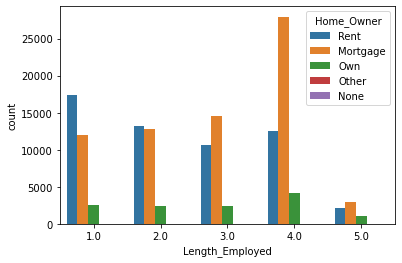

In [19]:
sns.countplot('Length_Employed',data = train, hue= 'Home_Owner')

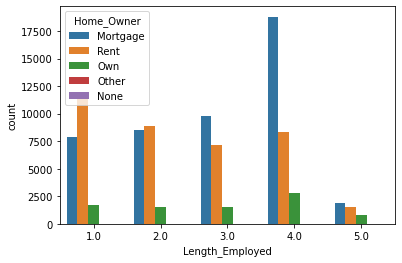

In [20]:
sns.countplot('Length_Employed',data = test, hue= 'Home_Owner')

In [21]:
train.groupby(['Length_Employed'])['Home_Owner'].agg(pd.Series.mode)

Length_Employed
1.0        Rent
2.0        Rent
3.0    Mortgage
4.0    Mortgage
5.0    Mortgage
Name: Home_Owner, dtype: object

In [22]:
test.groupby(['Length_Employed'])['Home_Owner'].agg(pd.Series.mode)

Length_Employed
1.0        Rent
2.0        Rent
3.0    Mortgage
4.0    Mortgage
5.0    Mortgage
Name: Home_Owner, dtype: object

In [23]:
train.groupby(['Home_Owner'])['Annual_Income'].agg(pd.Series.mode)

Home_Owner
Mortgage                                                60000
None        [22200.0, 32000.0, 40000.0, 50000.0, 51300.0, ...
Other       [32000.0, 35000.0, 42000.0, 45000.0, 58000.0, ...
Own                                                     60000
Rent                                                    50000
Name: Annual_Income, dtype: object

In [24]:
test.groupby(['Home_Owner'])['Annual_Income'].agg(pd.Series.mode)

Home_Owner
Mortgage                                                60000
None                                                    80000
Other       [16000.0, 25992.0, 28000.0, 29666.0, 35000.0, ...
Own                                                     50000
Rent                                                    50000
Name: Annual_Income, dtype: object

In [25]:
train.groupby(['Length_Employed'])['Annual_Income'].agg(pd.Series.mode)

Length_Employed
1.0    60000.0
2.0    60000.0
3.0    60000.0
4.0    60000.0
5.0    60000.0
Name: Annual_Income, dtype: float64

In [26]:
test.groupby(['Length_Employed'])['Annual_Income'].agg(pd.Series.mode)

Length_Employed
1.0    60000.0
2.0    50000.0
3.0    60000.0
4.0    60000.0
5.0    50000.0
Name: Annual_Income, dtype: float64

In [27]:
train.groupby(['Home_Owner'])['Loan_Amount_Requested'].agg(pd.Series.mode)

Home_Owner
Mortgage                     10,000
None                         12,000
Other       [10,000, 16,000, 7,500]
Own                          10,000
Rent                         10,000
Name: Loan_Amount_Requested, dtype: object

In [28]:
train.groupby(['Home_Owner'])['Debt_To_Income'].agg(pd.Series.mode)

Home_Owner
Mortgage    19.2
None        15.0
Other        9.5
Own          0.0
Rent        12.0
Name: Debt_To_Income, dtype: float64

In [29]:
train['Home_Owner'].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [30]:
cond=(train['Home_Owner'].isna())
train.loc[cond & (train['Debt_To_Income'] <= 15) & (train['Length_Employed'] <= 2),'Home_Owner']='Rent'
train.loc[cond & (train['Debt_To_Income'] > 15) & (train['Length_Employed'] > 2),'Home_Owner']='Mortgage'
train.loc[cond & (train['Length_Employed'] <= 2), 'Home_Owner'] = 'Rent'
train.loc[cond & (train['Length_Employed'] > 2), 'Home_Owner'] = 'Mortgage'

In [31]:
train['Home_Owner'].isnull().sum()

0

In [32]:
cond=(test['Home_Owner'].isna())
test.loc[cond & (test['Debt_To_Income'] <= 15) & (test['Length_Employed'] <= 2),'Home_Owner']='Rent'
test.loc[cond & (test['Debt_To_Income'] > 15) & (test['Length_Employed'] > 2),'Home_Owner']='Mortgage'
test.loc[cond & (test['Length_Employed'] <= 2), 'Home_Owner'] = 'Rent'
test.loc[cond & (test['Length_Employed'] > 2), 'Home_Owner'] = 'Mortgage'

In [33]:
test['Home_Owner'].isnull().sum()

0

In [34]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [35]:
train['Annual_Income'].fillna(value = 60000,inplace = True)
train['Months_Since_Deliquency'].fillna(value = 0,inplace = True)

In [36]:
test['Annual_Income'].fillna(value = 60000,inplace = True)
test['Months_Since_Deliquency'].fillna(value = 0,inplace = True)

In [37]:
train.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [38]:
test.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [39]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",1.0,Rent,68000.0,not verified,car,18.37,0,0.0,9,14,Female,1
1,10000002,"30,000",2.0,Mortgage,60000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",3.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,0.0,12,16,Male,3
3,10000004,"16,000",1.0,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,0.0,16,22,Male,3
4,10000005,"17,000",3.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,0.0,19,30,Female,1


In [40]:
cat_feats= ['Home_Owner', 'Income_Verified','Purpose_Of_Loan','Gender']

In [41]:
train = pd.get_dummies(train,columns = cat_feats,drop_first = True)

In [42]:
train.columns = ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED_income_source',
       'Income_Verified_not_verified', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Gender_Male']

In [43]:
test = pd.get_dummies(test,columns = cat_feats,drop_first = True)

In [44]:
test.columns=['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED_income_source',
       'Income_Verified_not_verified', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Gender_Male']

In [45]:
Train = train
Test = test

In [46]:
Train_y = Train['Interest_Rate']
Train.drop('Interest_Rate',axis =1,  inplace = True)

In [47]:
Train_y.head()

0    1
1    3
2    3
3    3
4    1
Name: Interest_Rate, dtype: int64

In [48]:
Train['Loan_Amount_Requested'] = Train['Loan_Amount_Requested'].apply(lambda x: x.split(',')[0])
Test['Loan_Amount_Requested'] = Test['Loan_Amount_Requested'].apply(lambda x: x.split(',')[0])

In [49]:
Train['Loan_Amount_Requested'] = Train['Loan_Amount_Requested'].astype('int64')
Test['Loan_Amount_Requested'] = Test['Loan_Amount_Requested'].astype('int64')

In [54]:
Train['Loan_Amount_Requested'] = Train['Loan_Amount_Requested'] * 1000
Test['Loan_Amount_Requested'] = Test['Loan_Amount_Requested'] * 1000

In [51]:
Train = pd.DataFrame(Train)
Train.columns = ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts','Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED_income_source',
       'Income_Verified_not_verified', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Gender_Male']

In [52]:
Test = pd.DataFrame(Test)
Test.columns = ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts','Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED_income_source',
       'Income_Verified_not_verified', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Gender_Male']

In [55]:
Train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_None,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10000001,7000.0,1.0,68000.0,18.37,0,0.0,9,14,0,...,0,0,0,0,0,0,0,0,0,0
1,10000002,30000.0,2.0,60000.0,14.93,0,17.0,12,24,0,...,0,0,0,0,0,0,0,0,0,0
2,10000003,24000.0,3.0,75566.4,15.88,0,0.0,12,16,0,...,0,0,0,0,0,0,0,0,0,1
3,10000004,16000.0,1.0,56160.0,14.34,3,0.0,16,22,0,...,0,0,0,0,0,0,0,0,0,1
4,10000005,17000.0,3.0,96000.0,22.17,1,0.0,19,30,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
Train.drop('Load_ID',axis =1,  inplace = True)
Test.drop('Loan_ID',axis =1,  inplace = True)
#Scaling all the variables in range of 0 to 1
scaler = MinMaxScaler()
Train = scaler.fit_transform(Train)
Test = scaler.fit_transform(Test)

# Modeling

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Train, Train_y, test_size=0.33, random_state=42)

In [60]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Mitesh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predictions = logmodel.predict(X_test)

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.49      0.16      0.24     11068
           2       0.48      0.66      0.56     23270
           3       0.57      0.53      0.55     19884

    accuracy                           0.51     54222
   macro avg       0.51      0.45      0.45     54222
weighted avg       0.51      0.51      0.49     54222



In [65]:
print(confusion_matrix(y_test,predictions))

[[ 1780  7657  1631]
 [ 1424 15445  6401]
 [  450  8967 10467]]


In [66]:
pred_1 = logmodel.predict(Test)

In [72]:
pred_1

array([2, 1, 3, ..., 2, 3, 2], dtype=int64)

In [74]:
# Importing AutoViML
from autoviml.Auto_ViML import Auto_ViML

In [88]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_None,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10000001,"7,000.00",1.00,"68,000.00",18.37,0,0.00,9,14,0,...,0,0,0,0,0,0,0,0,0,0
1,10000002,"30,000.00",2.00,"60,000.00",14.93,0,17.00,12,24,0,...,0,0,0,0,0,0,0,0,0,0
2,10000003,"24,000.00",3.00,"75,566.40",15.88,0,0.00,12,16,0,...,0,0,0,0,0,0,0,0,0,1
3,10000004,"16,000.00",1.00,"56,160.00",14.34,3,0.00,16,22,0,...,0,0,0,0,0,0,0,0,0,1
4,10000005,"17,000.00",3.00,"96,000.00",22.17,1,0.00,19,30,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Home_Owner_None,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10164310,27000,4.00,"129,000.00",12.87,0,68.00,10,37,0,...,0,0,0,0,0,0,0,0,0,1
1,10164311,26000,4.00,"110,000.00",11.37,0,0.00,6,23,0,...,0,0,0,0,0,0,0,0,0,1
2,10164312,6000,1.00,"75,000.00",6.83,2,0.00,5,20,0,...,0,0,0,0,0,0,0,0,0,1
3,10164313,12000,4.00,"73,000.00",7.76,0,0.00,6,8,0,...,0,0,0,0,0,0,0,0,0,1
4,10164314,35000,1.00,"156,000.00",9.62,0,26.00,9,21,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
A_Train = train
A_Train['Interest_Rate']=Train_y
A_Test = test
target = 'Interest_Rate'

##############  D A T A   S E T  A N A L Y S I S  #######################
    Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (164309, 30)
    Training Set Memory Usage = 15.67 MB
Test Set Shape = (109541, 29)
    Test Set Memory Usage = 9.61 MB
Single_Label Target: ['Interest_Rate']
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
Shuffling the data set before training
 Class  -> Counts -> Percent
     1:   33806  ->   20.6%
     3:   59923  ->   36.5%
     2:   70580  ->   43.0%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: Interest_Rate transformed as follows: {2: 0, 3: 1, 1: 2}
Alert! Rare Class is not 1 but 2 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    29 Predictors classified...
        Th

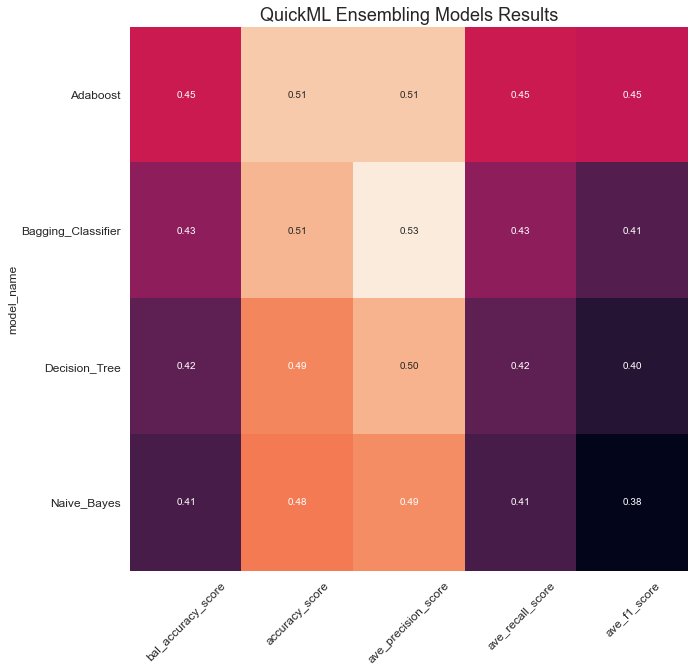

In [92]:
model, feats, trainm, testm = Auto_ViML(A_Train, target, A_Test,
                            sample_submission='', KMeans_Featurizer=False,
                            hyper_param='GS',feature_reduction=True,
                             Boosting_Flag=None,Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=0)

# Submission

In [57]:
Sub.head()

,Loan_ID,Interest_Rate
0,10164310,1
1,10164311,1
2,10164312,1
3,10164313,1
4,10164314,1


In [68]:
Sub['Interest_Rate'] = pred_1

In [70]:
Sub.to_csv("logi_try.csv",index=False)